# Rodar anteriormente

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from tabulate import tabulate

In [25]:
kCC = 1.0
kCN = 1.0
hN = 1.5
hC = 0
bcc = -2.5
acc = 0

def alphax(h):
    return acc + bcc * h
def betaxx(h):
    return bcc * h
def print_matrix(matrix):
    # 1. Encontrar a largura máxima de um número na matriz para alinhamento.
    max_width = 0
    for row in matrix:
        for num in row:
            width = len(str(num))
            if width > max_width:
                max_width = width
    
    # 2. Imprimir a matriz com a formatação.
    for row in matrix:
        # Cria uma linha formatada para a matriz.
        row_str = " ".join(f"{num:>{max_width}}" for num in row)
        print(row_str)

# Exercício 1

!["Azepina.png"](Azepina.png)

In [408]:
"""
             N(0)
     /                 \
  C(6)                 C(1)
   ||                  ||
  C(5) - C(4) = C(3) - C(2)

Existem ligações pi entre C(1) e C(2), entre C(3) e C(4) e entre C(5) e C(6).
"""

'\n             N(0)\n     /                   C(6)                 C(1)\n   ||                  ||\n  C(5) - C(4) = C(3) - C(2)\n\nExistem ligações pi entre C(1) e C(2), entre C(3) e C(4) e entre C(5) e C(6).\n'

A azepina é uma molécula organica cíclica e volátil que comumente utilizada no processo de obtenção de certos farmacos anticonvulcionantes. Neste trabalho o método de Huckel será utilizado para determinar os niveis de energia dessa molécula, estudar seus estados de energia mais excitados.

### Método Normal

In [19]:
# --- 1. Construção da Matriz ---

H = np.zeros((7, 7))

#Modificando a matriz

hN1 = 1.5
hC1 = 0.0
kCC1 = 0.9
kCC2 = 1.1
kCN1 = 0.8


H[0, 0] = alphax(hN1)
for i in range(1, 7):
    H[i, i] = alphax(hC1)


# Parâmetros de ressonância para ligações C-C
H[1, 2] = H[2, 1] = betaxx(kCC2)
H[2, 3] = H[3, 2] = betaxx(kCC1)
H[3, 4] = H[4, 3] = betaxx(kCC2)
H[4, 5] = H[5, 4] = betaxx(kCC1)
H[5, 6] = H[6, 5] = betaxx(kCC2)

# Parâmetros de ressonância para ligações N-C
H[0, 1] = H[1, 0] = betaxx(kCN1)
# Parâmetros de ressonância para ligações C-N
H[0, 6] = H[6, 0] = betaxx(kCN1)

print("--- Matriz de Hückel (Determinante Secular em forma matricial) ---")
print(H)

eigenvalues, eigenvectors = np.linalg.eigh(H)

mo_coeffs = eigenvectors.T  # Transpor para que cada linha seja um orbital

num_pi_electrons = 6 # Número total de elétrons pi na azepina

num_occupied_orbitals = num_pi_electrons // 2 # Número de orbitais ocupados (2 elétrons por orbital)


# Cálculo das populações eletrônicas (q_r) para cada átomo r
populations = np.zeros(7)
for r in range(7): # Para cada átomo r
    q_r = 0
    for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
        q_r += 2 * (eigenvectors[r, i]) ** 2
    populations[r] = q_r

# Cálculo das ordens de ligação pi (p_rs) entre átomos r e s
# p_rs = Σ (g_i * c_ri * c_si) sobre todos os orbitais i
bond_orders = np.zeros((7, 7))
for r in range(7):
    for s in range(r + 1, 7):
        p_rs = 0
        if H[r, s] != 0:
            for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
                p_rs += 2 * mo_coeffs[i, r] * mo_coeffs[i, r]
            bond_orders[r, s] = bond_orders[s, r] = p_rs

--- Matriz de Hückel (Determinante Secular em forma matricial) ---
[[-3.75 -2.    0.    0.    0.    0.   -2.  ]
 [-2.    0.   -2.75  0.    0.    0.    0.  ]
 [ 0.   -2.75  0.   -2.25  0.    0.    0.  ]
 [ 0.    0.   -2.25  0.   -2.75  0.    0.  ]
 [ 0.    0.    0.   -2.75  0.   -2.25  0.  ]
 [ 0.    0.    0.    0.   -2.25  0.   -2.75]
 [-2.    0.    0.    0.    0.   -2.75  0.  ]]


In [20]:
# --- 4. Apresentação dos Resultados ---

print("\n--- Níveis de Energia (eV) ---")
energy_headers = ["Orbital (ψ)", "Energia (x)", "Ocupação"]
energy_data = []
for i, energy in enumerate(eigenvalues):
    occupation = "2 e-" if i < num_occupied_orbitals else "0 e-"
    energy_data.append([f"ψ_{i+1}", f"{energy:.4f}", occupation])
print(tabulate(energy_data, headers=energy_headers, tablefmt="grid"))


--- Níveis de Energia (eV) ---
+---------------+---------------+------------+
| Orbital (ψ)   |   Energia (x) | Ocupação   |
+===============+===============+============+
| ψ_1           |       -5.7803 | 2 e-       |
+---------------+---------------+------------+
| ψ_2           |       -3.9604 | 2 e-       |
+---------------+---------------+------------+
| ψ_3           |       -3.2075 | 2 e-       |
+---------------+---------------+------------+
| ψ_4           |       -0.4444 | 0 e-       |
+---------------+---------------+------------+
| ψ_5           |        1.4331 | 0 e-       |
+---------------+---------------+------------+
| ψ_6           |        3.6851 | 0 e-       |
+---------------+---------------+------------+
| ψ_7           |        4.5245 | 0 e-       |
+---------------+---------------+------------+


In [21]:
# Identificar HOMO e LUMO
homo_index = num_occupied_orbitals - 1
lumo_index = num_occupied_orbitals
homo_energy = eigenvalues[homo_index]
lumo_energy = eigenvalues[lumo_index]
print(f"\nHOMO: ψ_{homo_index + 1} (Energia = {homo_energy:.4f} eV)")
print(f"LUMO: ψ_{lumo_index + 1} (Energia = {lumo_energy:.4f} eV)")
print("-" * 60)

print("\n--- Coeficientes dos Orbitais Moleculares (ψ_i) ---")
mo_headers = ["Orbital"] + [f"Átomo {j+1}" for j in range(7)]
mo_data = []
for i, mo in enumerate(mo_coeffs):
    mo_data.append([f"ψ_{i+1}"] + [f"{c:.3f}" for c in mo])
print(tabulate(mo_data, headers=mo_headers, tablefmt="grid"))



HOMO: ψ_3 (Energia = -3.2075 eV)
LUMO: ψ_4 (Energia = -0.4444 eV)
------------------------------------------------------------

--- Coeficientes dos Orbitais Moleculares (ψ_i) ---
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| Orbital   |   Átomo 1 |   Átomo 2 |   Átomo 3 |   Átomo 4 |   Átomo 5 |   Átomo 6 |   Átomo 7 |
+===========+===========+===========+===========+===========+===========+===========+===========+
| ψ_1       |    -0.731 |    -0.371 |    -0.248 |    -0.184 |    -0.184 |    -0.248 |    -0.371 |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| ψ_2       |     0.457 |     0.024 |    -0.298 |    -0.553 |    -0.553 |    -0.298 |     0.024 |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| ψ_3       |     0     |     0.442 |     0.516 |     0.195 |    -0.195 |    -0.516 |    -0.442 |
+-----------+-----------+----------

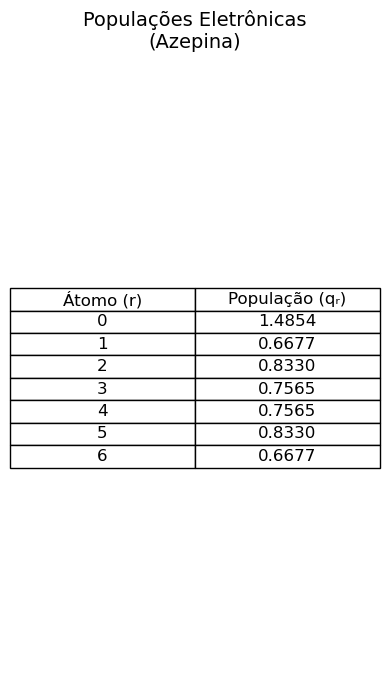

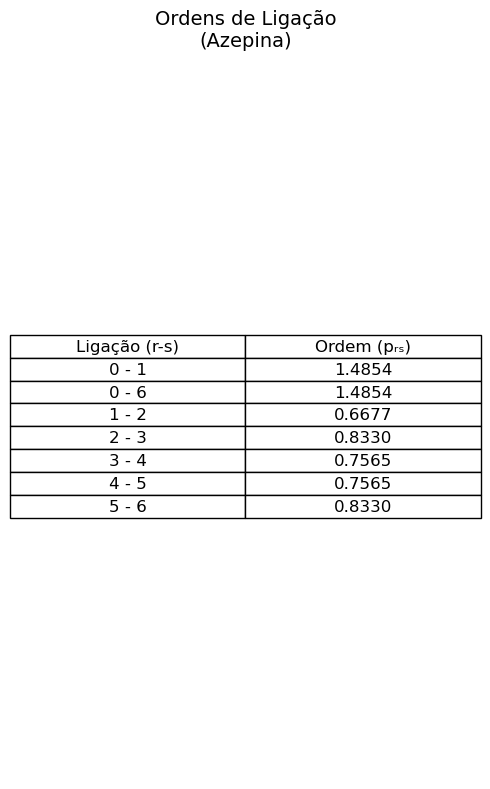

In [22]:
# --- 3. Geração e Exibição das Tabelas ---

# --- Tabela 1: Populações Eletrônicas ---
pop_data = [[f"{i}", f"{populations[i]:.4f}"] for i in range(7)]
pop_col_labels = ["Átomo (r)", "População (q\u1D63)"]

fig1, ax1 = plt.subplots(figsize=(4, 7))
ax1.axis('tight')
ax1.axis('off')
table1 = ax1.table(cellText=pop_data, colLabels=pop_col_labels, loc='center', cellLoc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(12)
table1.scale(1.2, 1.2)
ax1.set_title("Populações Eletrônicas\n(Azepina)", fontsize=14, pad=20)
plt.tight_layout()

# --- Tabela 2: Ordens de Ligação ---
bond_data = []
for r in range(7):
    for s in range(r + 1, 7):
        if bond_orders[r, s] != 0:
            bond_data.append([f"{r} - {s}", f"{bond_orders[r,s]:.4f}"])
bond_col_labels = ["Ligação (r-s)", "Ordem (p\u1D63\u209B)"]

fig2, ax2 = plt.subplots(figsize=(5, 8))
ax2.axis('tight')
ax2.axis('off')
table2 = ax2.table(cellText=bond_data, colLabels=bond_col_labels, loc='center', cellLoc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(12)
table2.scale(1.2, 1.2)
ax2.set_title("Ordens de Ligação\n(Azepina)", fontsize=14, pad=20)
plt.tight_layout()

plt.show()

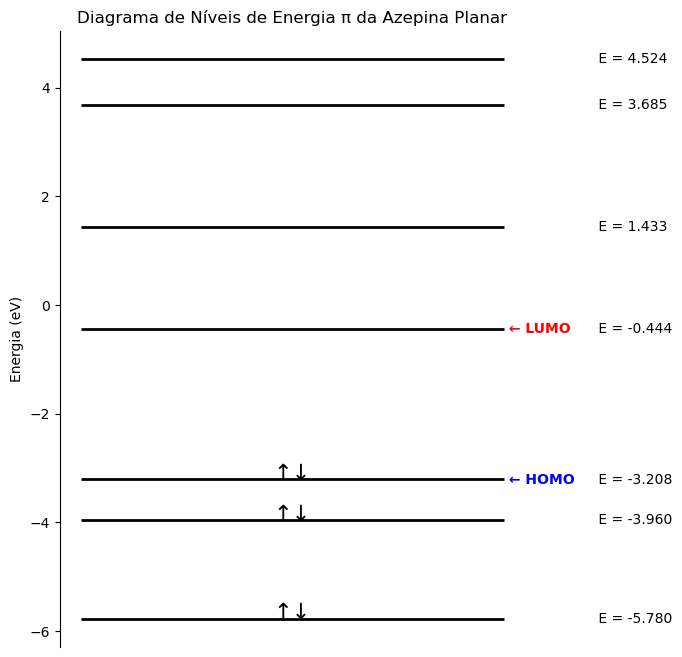

In [23]:
# --- 5. Diagrama de Níveis de Energia ---
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_title("Diagrama de Níveis de Energia π da Azepina Planar")
ax.set_ylabel("Energia (eV)")
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for i, energy in enumerate(eigenvalues):
    ax.hlines(y=energy, xmin=0.8, xmax=2.2, color='k', lw=2)
    ax.text(2.5, energy, f" E = {energy:.3f}", va='center')
    # Preenchimento eletrônico
    if i < num_occupied_orbitals:
        ax.text(1.5, energy, "↑↓", ha='center', fontsize=16) # Duplamente ocupado

ax.text(2.2, homo_energy, " ← HOMO", va='center', color='blue', weight='bold')
ax.text(2.2, lumo_energy, " ← LUMO", va='center', color='red', weight='bold')
plt.show()

Note que as ordens ligação associadas ao átomo de nitrogênio tem maior população eletrônica. Doravante a tal fato, pode-se concluir que o modelo está condizente com a química, pois é esperado que um átomo eletronegativo como o $N$ deva ''atrair'' as núvens eletrônicas para próximo de seu núcleo em relação a átomos de carbono, de eletronegatividade menor.

### Código feito por IA (está errado)

In [414]:
""" def huckel_calculation_azepine():
    """
    Realiza o cálculo completo pelo método de Hückel para a molécula de 1H-Azepina,
    assumindo uma geometria planar hipotética.
    """
    

    # Parâmetros de ressonância para as ligações C-C (valor padrão k=1)
    for i in range(1, 6):
        H[i, i + 1] = H[i + 1, i] = 1.0

    # Parâmetros de ressonância para as ligações N-C (N-1 com C-2 e C-7)
    H[0, 1] = H[1, 0] = k_CN
    H[0, 6] = H[6, 0] = k_CN

    print("--- Matriz de Hückel (Determinante Secular em forma matricial) ---")
    print("Os elementos da diagonal são (α - E)/β + h e os fora da diagonal são k.")
    print("Resolvendo Hψ = Eψ, onde α=0 e β=1, os autovalores são as energias.")
    print(H)
    print("-" * 60)

    # --- 2. Resolução do Determinante Secular ---
    # Resolver o problema de autovalores/autovetores.
    # Autovalores (eigenvalues) correspondem aos níveis de energia (x_i).
    # Autovetores (eigenvectors) são os coeficientes dos orbitais moleculares (c_ji).
    # A energia de um orbital i é E_i = α + x_i * β.
    # Como usamos x_i = (E-α)/β, os autovalores são os próprios x_i.
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    # A função eigh já retorna os autovalores em ordem crescente.
    # Os autovetores estão nas colunas da matriz 'eigenvectors'
    mo_coeffs = eigenvectors.T  # Transpor para que cada linha seja um orbital

    # --- 3. Análise dos Resultados ---

    # Número de elétrons pi no sistema
    num_pi_electrons = 8
    # Número de orbitais ocupados
    num_occupied_orbitals = num_pi_electrons // 2

    # Cálculo das populações eletrônicas (q_r) para cada átomo r
    # q_r = Σ (g_i * c_ri^2) sobre todos os orbitais i
    # g_i é o número de ocupação (2 para ocupado, 0 para vazio)
    populations = np.zeros(7)
    for r in range(7): # Para cada átomo r
        q_r = 0
        for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
            q_r += 2 * (eigenvectors[r, i] ** 2)
        populations[r] = q_r

    # Cálculo das cargas formais pi
    # Carga = (elétrons pi contribuídos) - q_r
    pi_charges = np.array([2.0] + [1.0]*6) - populations

    # Cálculo das ordens de ligação pi (p_rs) entre átomos r e s
    # p_rs = Σ (g_i * c_ri * c_si) sobre todos os orbitais i
    bond_orders = np.zeros((7, 7))
    for r in range(7):
        for s in range(r + 1, 7):
            p_rs = 0
            # Apenas calcular para vizinhos para simplificar
            if H[r, s] != 0:
                for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
                    p_rs += 2 * eigenvectors[r, i] * eigenvectors[s, i]
                bond_orders[r, s] = bond_orders[s, r] = p_rs


    # --- 4. Apresentação dos Resultados ---

    print("\n--- Níveis de Energia (E = α + xβ) ---")
    energy_headers = ["Orbital (ψ)", "Energia (x)", "Ocupação"]
    energy_data = []
    for i, energy in enumerate(eigenvalues):
        occupation = "2 e-" if i < num_occupied_orbitals else "0 e-"
        energy_data.append([f"ψ_{i+1}", f"{energy:.4f}", occupation])
    print(tabulate(energy_data, headers=energy_headers, tablefmt="grid"))

    # Identificar HOMO e LUMO
    homo_index = num_occupied_orbitals - 1
    lumo_index = num_occupied_orbitals
    homo_energy = eigenvalues[homo_index]
    lumo_energy = eigenvalues[lumo_index]
    print(f"\nHOMO: ψ_{homo_index + 1} (Energia = {homo_energy:.4f}β)")
    print(f"LUMO: ψ_{lumo_index + 1} (Energia = {lumo_energy:.4f}β)")
    print("-" * 60)

    print("\n--- Coeficientes dos Orbitais Moleculares (ψ_i) ---")
    mo_headers = ["Orbital"] + [f"Átomo {j+1}" for j in range(7)]
    mo_data = []
    for i, mo in enumerate(mo_coeffs):
        mo_data.append([f"ψ_{i+1}"] + [f"{c:.3f}" for c in mo])
    print(tabulate(mo_data, headers=mo_headers, tablefmt="grid"))
    print("-" * 60)

    print("\n--- Populações Eletrônicas e Cargas π ---")
    pop_headers = ["Átomo", "População π (q_r)", "Carga π"]
    pop_data = [("N-1", f"{populations[0]:.3f}", f"{pi_charges[0]:.3f}")]
    for i in range(1, 7):
        pop_data.append((f"C-{i+1}", f"{populations[i]:.3f}", f"{pi_charges[i]:.3f}"))
    print(tabulate(pop_data, headers=pop_headers, tablefmt="grid"))
    print(f"Soma total de elétrons π: {np.sum(populations):.2f}")
    print("-" * 60)

    print("\n--- Ordens de Ligação π ---")
    bo_headers = ["Ligação", "Ordem de Ligação π (p_rs)"]
    bo_data = [
        ("N1-C2", f"{bond_orders[0, 1]:.3f}"),
        ("C2-C3", f"{bond_orders[1, 2]:.3f}"),
        ("C3-C4", f"{bond_orders[2, 3]:.3f}"),
        ("C4-C5", f"{bond_orders[3, 4]:.3f}"),
        ("C5-C6", f"{bond_orders[4, 5]:.3f}"),
        ("C6-C7", f"{bond_orders[5, 6]:.3f}"),
        ("C7-N1", f"{bond_orders[6, 0]:.3f}"),
    ]
    print(tabulate(bo_data, headers=bo_headers, tablefmt="grid"))
    print("-" * 60)

    # --- 5. Diagrama de Níveis de Energia ---
    fig, ax = plt.subplots(figsize=(6, 8))
    ax.set_title("Diagrama de Níveis de Energia π da Azepina Planar")
    ax.set_ylabel("Energia (unidades de β)")
    ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    for i, energy in enumerate(eigenvalues):
        ax.hlines(y=energy, xmin=0.8, xmax=2.2, color='k', lw=2)
        ax.text(2.3, energy, f" E = {energy:.3f}", va='center')
        # Preenchimento eletrônico
        if i < num_occupied_orbitals-1:
            ax.text(1.5, energy + 0.05, "↑↓", ha='center', fontsize=16) # Duplamente ocupado
        elif i == num_occupied_orbitals-1:
            ax.text(1.5, energy + 0.05, "↑", ha='center', fontsize=16) # Singlet

    ax.text(1.5, homo_energy, " ← HOMO", va='center', color='blue', weight='bold')
    ax.text(1.5, lumo_energy, " ← LUMO", va='center', color='red', weight='bold')
    plt.show()

# Executa a função principal
if __name__ == "__main__":
    huckel_calculation_azepine() """

IndentationError: unexpected indent (735248955.py, line 3)

# Exercício 2

In [504]:
HOMOs = [-1.0355339059327369, -1.304379846605567, -1.6814264561913297]
LUMOs = [1.0355339059327373, 0.6725409659714958, 0.43405778958299357]
Gaps = []
for i in range(3):
    Gaps.append(LUMOs[i]-HOMOs[i]) 

### Antraceno

![{4428A5C5-D45B-450B-9396-456F2789E176}.png](Antraceno.png)

![image.png](image.png)

Tabela de ligações químicas do antraceno.

In [499]:
# --- 1. Construção da Matriz ---

H = np.zeros((14, 14))

#Modificando a matriz

for i in range(14):
    H[i,i] = alphax(hC)

H[0,1] = H[1,0] = betaxx(kCC)
H[1,2] = H[2,1] = betaxx(kCC)
H[2,3] = H[3,2] = betaxx(kCC)
H[3,4] = H[4,3] = betaxx(kCC)
H[4,5] = H[5,4] = betaxx(kCC)
H[5,6] = H[6,5] = betaxx(kCC)
H[6,7] = H[7,6] = betaxx(kCC)
H[7,8] = H[8,7] = betaxx(kCC)
H[8,9] = H[9,8] = betaxx(kCC)
H[9,10] = H[10,9] = betaxx(kCC)
H[10,11] = H[11,10] = betaxx(kCC)
H[11,12] = H[12,11] = betaxx(kCC)
H[6,11] = H[11,6] = betaxx(kCC)
H[12,13] = H[13,12] = betaxx(kCC)
H[13,4] = H[4,13] = betaxx(kCC)
H[0,13] = H[13,0] = betaxx(kCC)

print("--- Matriz de Hückel (Determinante Secular em forma matricial) ---")
print_matrix(H)

eigenvalues, eigenvectors = np.linalg.eigh(H)

mo_coeffs = eigenvectors.T  # Transpor para que cada linha seja um orbital

num_pi_electrons = 14 # Número total de elétrons pi na azepina

num_occupied_orbitals = num_pi_electrons // 2 # Número de orbitais ocupados (2 elétrons por orbital)


# Cálculo das populações eletrônicas (q_r) para cada átomo r
populations = np.zeros(14)
for r in range(14): # Para cada átomo r
    q_r = 0
    for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
        q_r += 2 * (eigenvectors[r, i]) ** 2
    populations[r] = q_r

# Cálculo das ordens de ligação pi (p_rs) entre átomos r e s
# p_rs = Σ (g_i * c_ri * c_si) sobre todos os orbitais i
bond_orders = np.zeros((14, 14))
for r in range(14):
    for s in range(r + 1, 14):
        p_rs = 0
        if H[r, s] != 0:
            for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
                p_rs += 2 * mo_coeffs[i, r] * mo_coeffs[i, r]
            bond_orders[r, s] = bond_orders[s, r] = p_rs

--- Matriz de Hückel (Determinante Secular em forma matricial) ---
 0.0 -2.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -2.5
-2.5  0.0 -2.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0 -2.5  0.0 -2.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0 -2.5  0.0 -2.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0 -2.5  0.0 -2.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -2.5
 0.0  0.0  0.0  0.0 -2.5  0.0 -2.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0 -2.5  0.0 -2.5  0.0  0.0  0.0 -2.5  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0 -2.5  0.0 -2.5  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0 -2.5  0.0 -2.5  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -2.5  0.0 -2.5  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -2.5  0.0 -2.5  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0 -2.5  0.0  0.0  0.0 -2.5  0.0 -2.5  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -2.5  0.0 -2.5
-2.5  0.0  0.0  0.0 -2.

In [500]:
# --- 4. Apresentação dos Resultados ---

print("\n--- Níveis de Energia (eV) ---")
energy_headers = ["Orbital (ψ)", "Energia (x)", "Ocupação"]
energy_data = []
for i, energy in enumerate(eigenvalues):
    occupation = "2 e-" if i < num_occupied_orbitals else "0 e-"
    energy_data.append([f"ψ_{i+1}", f"{energy:.4f}", occupation])
print(tabulate(energy_data, headers=energy_headers, tablefmt="grid"))


--- Níveis de Energia (eV) ---
+---------------+---------------+------------+
| Orbital (ψ)   |   Energia (x) | Ocupação   |
+===============+===============+============+
| ψ_1           |       -6.0355 | 2 e-       |
+---------------+---------------+------------+
| ψ_2           |       -5      | 2 e-       |
+---------------+---------------+------------+
| ψ_3           |       -3.5355 | 2 e-       |
+---------------+---------------+------------+
| ψ_4           |       -3.5355 | 2 e-       |
+---------------+---------------+------------+
| ψ_5           |       -2.5    | 2 e-       |
+---------------+---------------+------------+
| ψ_6           |       -2.5    | 2 e-       |
+---------------+---------------+------------+
| ψ_7           |       -1.0355 | 2 e-       |
+---------------+---------------+------------+
| ψ_8           |        1.0355 | 0 e-       |
+---------------+---------------+------------+
| ψ_9           |        2.5    | 0 e-       |
+---------------+-----------

In [501]:
# Identificar HOMO e LUMO
homo_index = num_occupied_orbitals - 1
lumo_index = num_occupied_orbitals
homo_energy = eigenvalues[homo_index]
lumo_energy = eigenvalues[lumo_index]
print(f"\nHOMO: ψ_{homo_index + 1} (Energia = {homo_energy:.4f} eV)")
print(f"LUMO: ψ_{lumo_index + 1} (Energia = {lumo_energy:.4f} eV)")
print("-" * 60)

print("\n--- Coeficientes dos Orbitais Moleculares (ψ_i) ---")
mo_headers = ["Orbital"] + [f"Átomo {j+1}" for j in range(14)]
mo_data = []
for i, mo in enumerate(mo_coeffs):
    mo_data.append([f"ψ_{i+1}"] + [f"{c:.3f}" for c in mo])
print(tabulate(mo_data, headers=mo_headers, tablefmt="grid"))



HOMO: ψ_7 (Energia = -1.0355 eV)
LUMO: ψ_8 (Energia = 1.0355 eV)
------------------------------------------------------------

--- Coeficientes dos Orbitais Moleculares (ψ_i) ---
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+
| Orbital   |   Átomo 1 |   Átomo 2 |   Átomo 3 |   Átomo 4 |   Átomo 5 |   Átomo 6 |   Átomo 7 |   Átomo 8 |   Átomo 9 |   Átomo 10 |   Átomo 11 |   Átomo 12 |   Átomo 13 |   Átomo 14 |
+===========+===========+===========+===========+===========+===========+===========+===========+===========+===========+============+============+============+============+============+
| ψ_1       |     0.215 |     0.152 |     0.152 |     0.215 |     0.367 |     0.304 |     0.367 |     0.215 |     0.152 |      0.152 |      0.215 |      0.367 |      0.304 |      0.367 |
+-----------+-----------+-----------+-----------+-----------+-----------

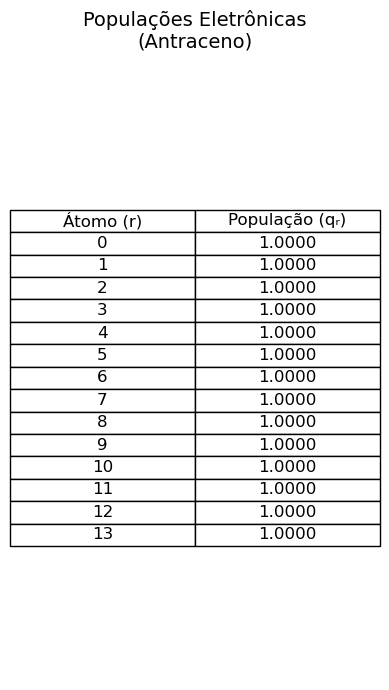

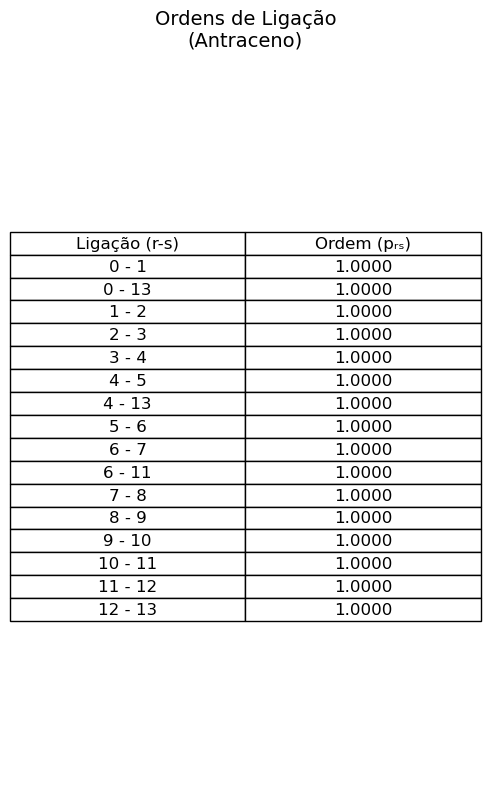

In [502]:
# --- 3. Geração e Exibição das Tabelas ---

# --- Tabela 1: Populações Eletrônicas ---
pop_data = [[f"{i}", f"{populations[i]:.4f}"] for i in range(14)]
pop_col_labels = ["Átomo (r)", "População (q\u1D63)"]

fig1, ax1 = plt.subplots(figsize=(4, 7))
ax1.axis('tight')
ax1.axis('off')
table1 = ax1.table(cellText=pop_data, colLabels=pop_col_labels, loc='center', cellLoc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(12)
table1.scale(1.2, 1.2)
ax1.set_title("Populações Eletrônicas\n(Antraceno)", fontsize=14, pad=20)
plt.tight_layout()

# --- Tabela 2: Ordens de Ligação ---
bond_data = []
for r in range(14):
    for s in range(r + 1, 14):
        if bond_orders[r, s] != 0:
            bond_data.append([f"{r} - {s}", f"{bond_orders[r,s]:.4f}"])
bond_col_labels = ["Ligação (r-s)", "Ordem (p\u1D63\u209B)"]

fig2, ax2 = plt.subplots(figsize=(5, 8))
ax2.axis('tight')
ax2.axis('off')
table2 = ax2.table(cellText=bond_data, colLabels=bond_col_labels, loc='center', cellLoc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(12)
table2.scale(1.2, 1.2)
ax2.set_title("Ordens de Ligação\n(Antraceno)", fontsize=14, pad=20)
plt.tight_layout()

plt.show()

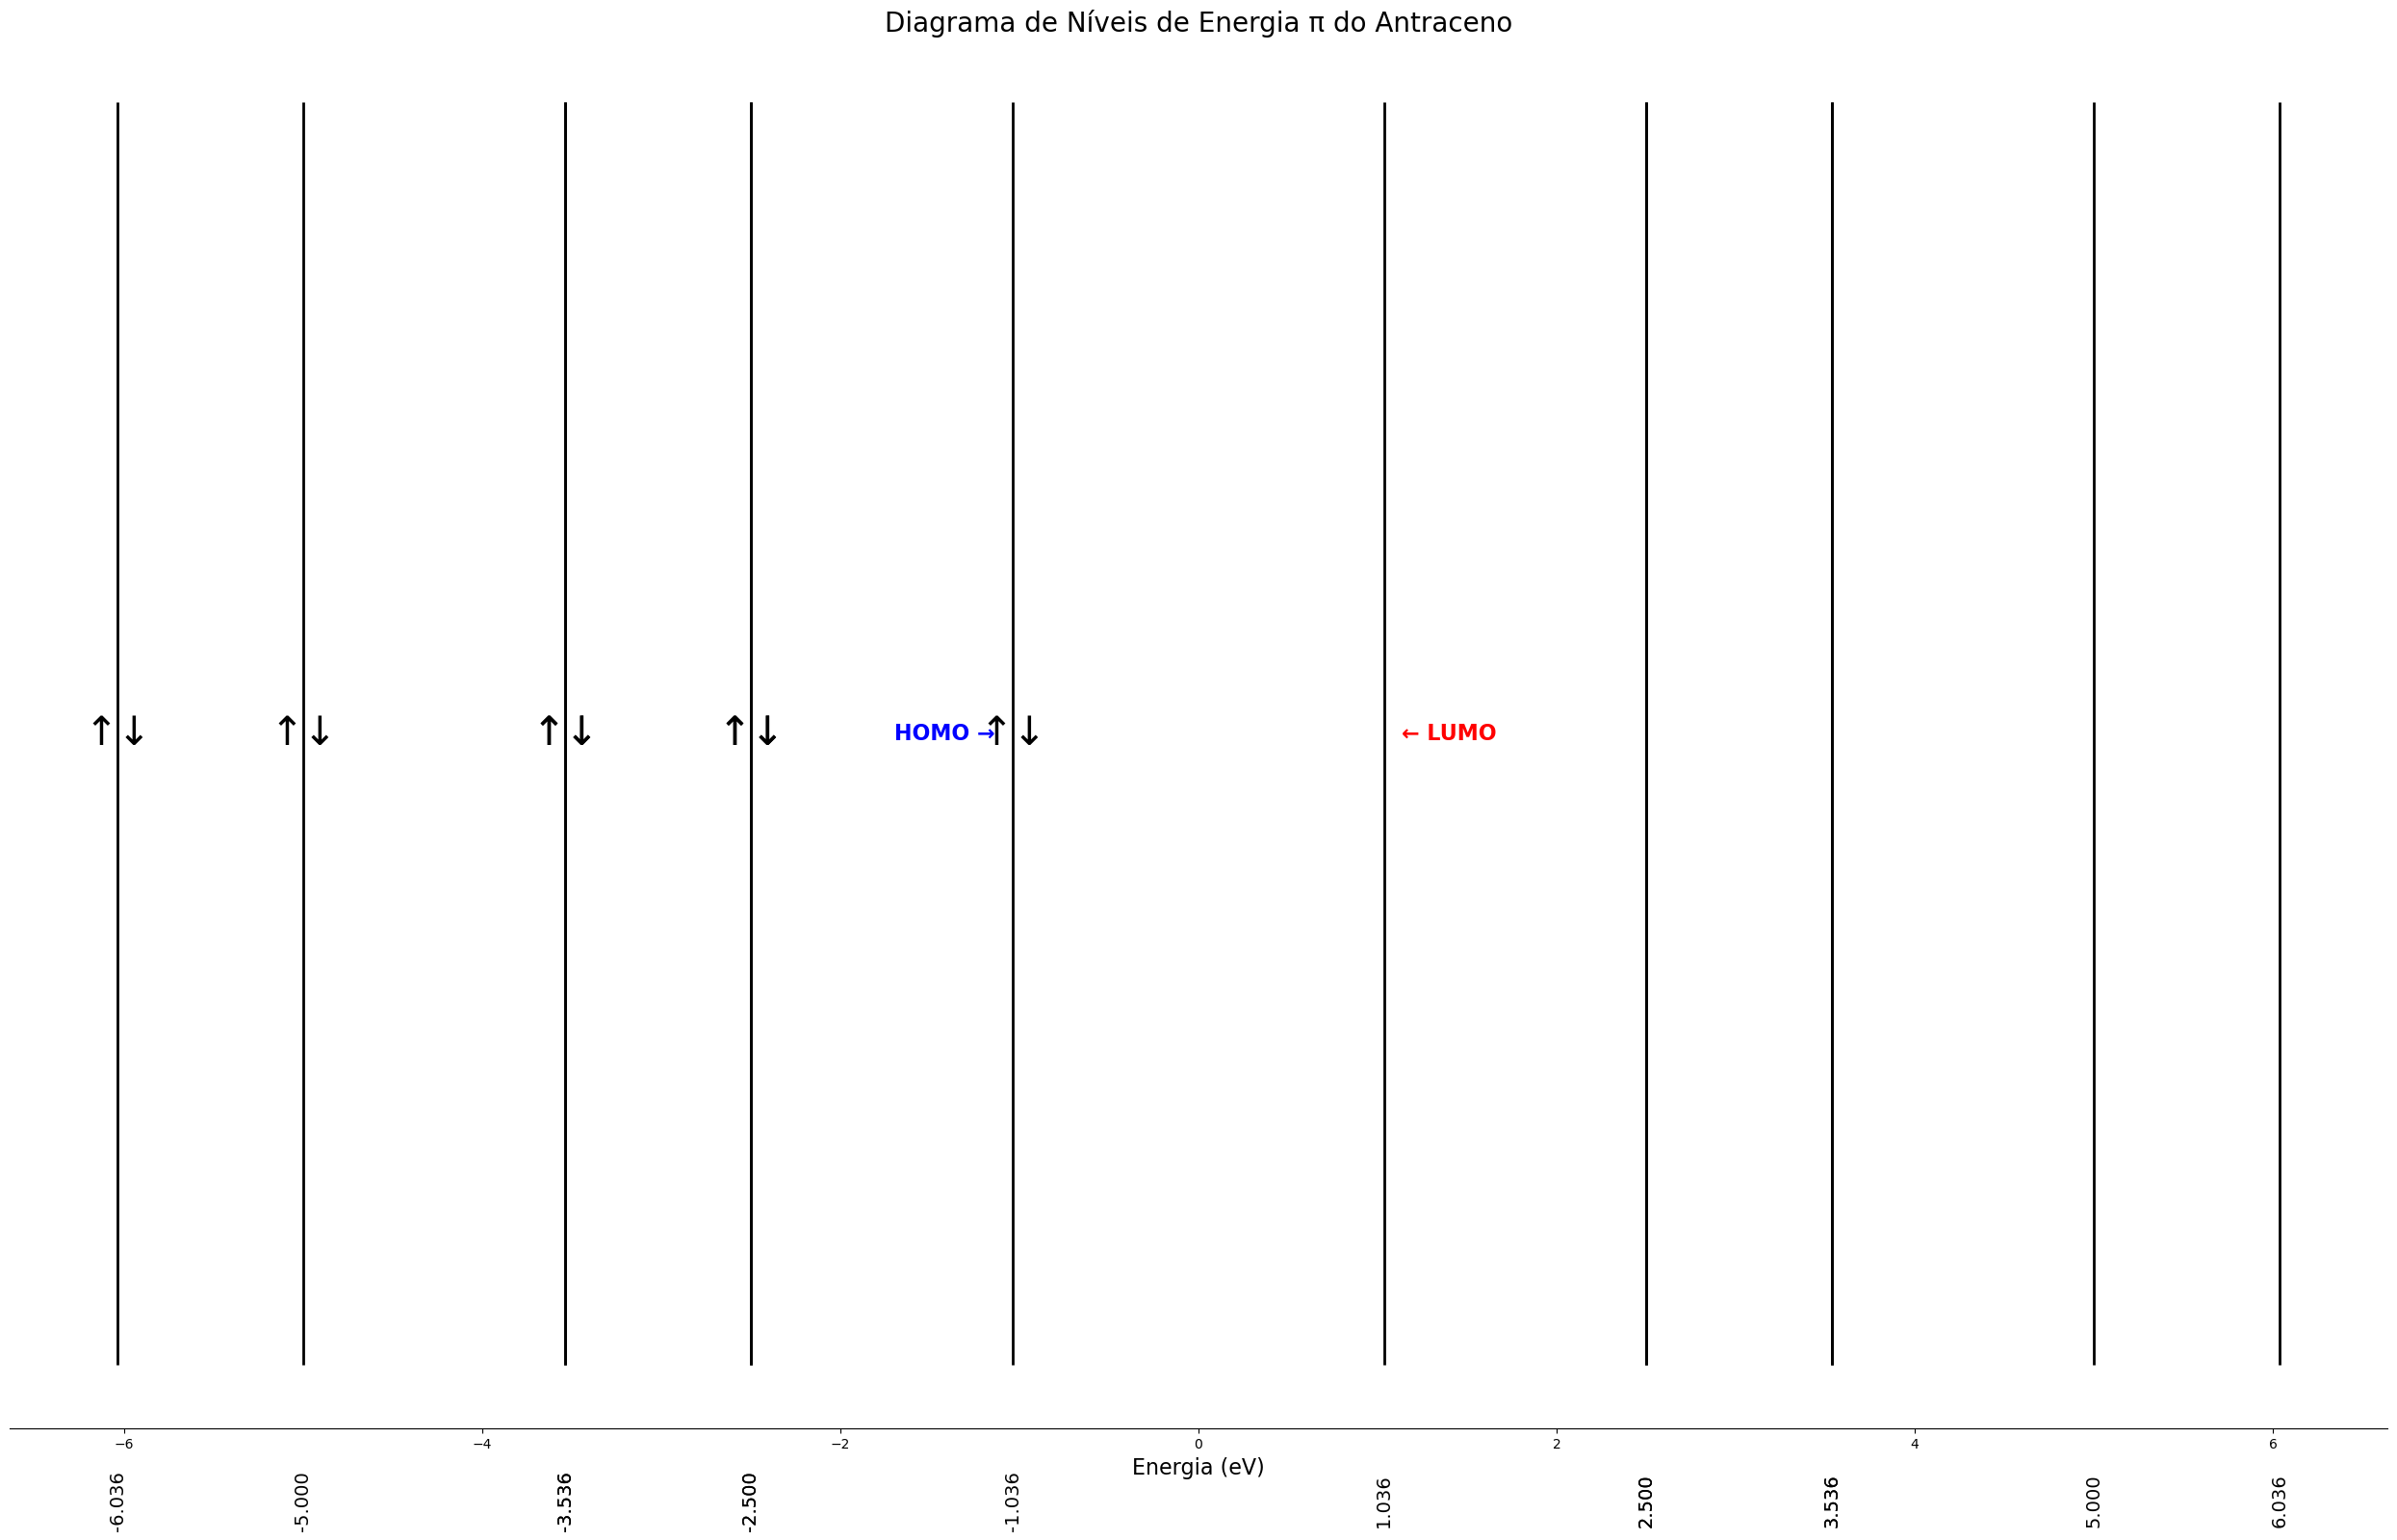

In [503]:
# --- Diagrama de Níveis de Energia (Horizontal) ---
fig, ax = plt.subplots(figsize=(25, 16))

# --- Definição dos tamanhos de fonte ---
ax.set_title("Diagrama de Níveis de Energia π do Antraceno", fontsize=20)
ax.set_xlabel("Energia (eV)", fontsize=16)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for i, energy in enumerate(eigenvalues):
    ax.vlines(x=energy, ymin=0.8, ymax=2.2, color='k', lw=2)
    # Fonte para os valores de energia
    ax.text(energy, 0.65, f"{energy:.3f}", ha='center', va='center', rotation=90, fontsize=14)
    
    if i < num_occupied_orbitals:
        # Fonte para os elétrons
        ax.text(energy, 1.5, "↑↓", ha='center', va='center', fontsize=30)

# Fonte para os rótulos HOMO/LUMO
ax.text(homo_energy - 0.1, 1.5, "HOMO →", ha='right', va='center', color='blue', weight='bold', fontsize=16)
ax.text(lumo_energy + 0.1, 1.5, "← LUMO", ha='left', va='center', color='red', weight='bold', fontsize=16)

# Ajusta o layout para evitar que os textos fiquem cortados
plt.tight_layout()

# Opcional: exibe o gráfico em uma janela
plt.show()


### Mono-aza-antraceno 

![{71B64EA7-C2C4-4EF9-AFB2-677F1CF43D9F}.png](Mono-Aza-Antraceno.png)

In [488]:
# --- 1. Construção da Matriz ---

H = np.zeros((14, 14))

#Modificando a matriz

for i in range(14):
    if i == 3:
        H[i,i] = alphax(hN)
    else:
        H[i,i] = alphax(hC)

H[0,1] = H[1,0] = betaxx(kCC)
H[1,2] = H[2,1] = betaxx(kCC)
H[2,3] = H[3,2] = betaxx(kCN)
H[3,4] = H[4,3] = betaxx(kCN)
H[4,5] = H[5,4] = betaxx(kCC)
H[5,6] = H[6,5] = betaxx(kCC)
H[6,7] = H[7,6] = betaxx(kCC)
H[7,8] = H[8,7] = betaxx(kCC)
H[8,9] = H[9,8] = betaxx(kCC)
H[9,10] = H[10,9] = betaxx(kCC)
H[10,11] = H[11,10] = betaxx(kCC)
H[11,12] = H[12,11] = betaxx(kCC)
H[6,11] = H[11,6] = betaxx(kCC)
H[12,13] = H[13,12] = betaxx(kCC)
H[13,4] = H[4,13] = betaxx(kCC)
H[0,13] = H[13,0] = betaxx(kCC)

print("--- Matriz de Hückel (Determinante Secular em forma matricial) ---")
print_matrix(H)

eigenvalues, eigenvectors = np.linalg.eigh(H)

mo_coeffs = eigenvectors.T  # Transpor para que cada linha seja um orbital

num_pi_electrons = 14 # Número total de elétrons pi na azepina

num_occupied_orbitals = num_pi_electrons // 2 # Número de orbitais ocupados (2 elétrons por orbital)


# Cálculo das populações eletrônicas (q_r) para cada átomo r
populations = np.zeros(14)
for r in range(14): # Para cada átomo r
    q_r = 0
    for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
        q_r += 2 * (eigenvectors[r, i]) ** 2
    populations[r] = q_r

# Cálculo das ordens de ligação pi (p_rs) entre átomos r e s
# p_rs = Σ (g_i * c_ri * c_si) sobre todos os orbitais i
bond_orders = np.zeros((14, 14))
for r in range(14):
    for s in range(r + 1, 14):
        p_rs = 0
        if H[r, s] != 0:
            for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
                p_rs += 2 * mo_coeffs[i, r] * mo_coeffs[i, s]
            bond_orders[r, s] = bond_orders[s, r] = p_rs

--- Matriz de Hückel (Determinante Secular em forma matricial) ---
  0.0  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.5
 -2.5   0.0  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -2.5   0.0  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -2.5 -3.75  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.5
  0.0   0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0  -2.5   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0
  0.0   0

In [489]:
# --- 4. Apresentação dos Resultados ---

print("\n--- Níveis de Energia (eV) ---")
energy_headers = ["Orbital (ψ)", "Energia (x)", "Ocupação"]
energy_data = []
for i, energy in enumerate(eigenvalues):
    occupation = "2 e-" if i < num_occupied_orbitals else "0 e-"
    energy_data.append([f"ψ_{i+1}", f"{energy:.4f}", occupation])
print(tabulate(energy_data, headers=energy_headers, tablefmt="grid"))


--- Níveis de Energia (eV) ---
+---------------+---------------+------------+
| Orbital (ψ)   |   Energia (x) | Ocupação   |
+===============+===============+============+
| ψ_1           |       -6.6661 | 2 e-       |
+---------------+---------------+------------+
| ψ_2           |       -5.509  | 2 e-       |
+---------------+---------------+------------+
| ψ_3           |       -4.1272 | 2 e-       |
+---------------+---------------+------------+
| ψ_4           |       -3.5355 | 2 e-       |
+---------------+---------------+------------+
| ψ_5           |       -2.9522 | 2 e-       |
+---------------+---------------+------------+
| ψ_6           |       -2.5    | 2 e-       |
+---------------+---------------+------------+
| ψ_7           |       -1.3044 | 2 e-       |
+---------------+---------------+------------+
| ψ_8           |        0.6725 | 0 e-       |
+---------------+---------------+------------+
| ψ_9           |        2.0339 | 0 e-       |
+---------------+-----------

In [490]:
# Identificar HOMO e LUMO
homo_index = num_occupied_orbitals - 1
lumo_index = num_occupied_orbitals
homo_energy = eigenvalues[homo_index]
lumo_energy = eigenvalues[lumo_index]
print(f"\nHOMO: ψ_{homo_index + 1} (Energia = {homo_energy:.4f} eV)")
print(f"LUMO: ψ_{lumo_index + 1} (Energia = {lumo_energy:.4f} eV)")
print("-" * 60)

print("\n--- Coeficientes dos Orbitais Moleculares (ψ_i) ---")
mo_headers = ["Orbital"] + [f"Átomo {j+1}" for j in range(14)]
mo_data = []
for i, mo in enumerate(mo_coeffs):
    mo_data.append([f"ψ_{i+1}"] + [f"{c:.3f}" for c in mo])
print(tabulate(mo_data, headers=mo_headers, tablefmt="grid"))



HOMO: ψ_7 (Energia = -1.3044 eV)
LUMO: ψ_8 (Energia = 0.6725 eV)
------------------------------------------------------------

--- Coeficientes dos Orbitais Moleculares (ψ_i) ---
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+
| Orbital   |   Átomo 1 |   Átomo 2 |   Átomo 3 |   Átomo 4 |   Átomo 5 |   Átomo 6 |   Átomo 7 |   Átomo 8 |   Átomo 9 |   Átomo 10 |   Átomo 11 |   Átomo 12 |   Átomo 13 |   Átomo 14 |
+===========+===========+===========+===========+===========+===========+===========+===========+===========+===========+============+============+============+============+============+
| ψ_1       |    -0.179 |    -0.182 |    -0.307 |    -0.637 |    -0.436 |    -0.23  |    -0.179 |    -0.086 |    -0.05  |     -0.048 |     -0.078 |     -0.16  |     -0.171 |     -0.294 |
+-----------+-----------+-----------+-----------+-----------+-----------

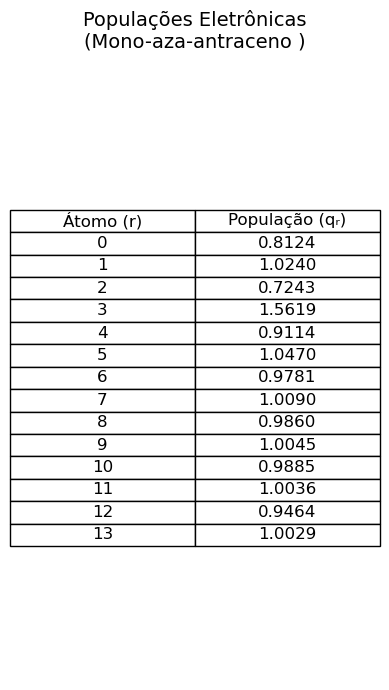

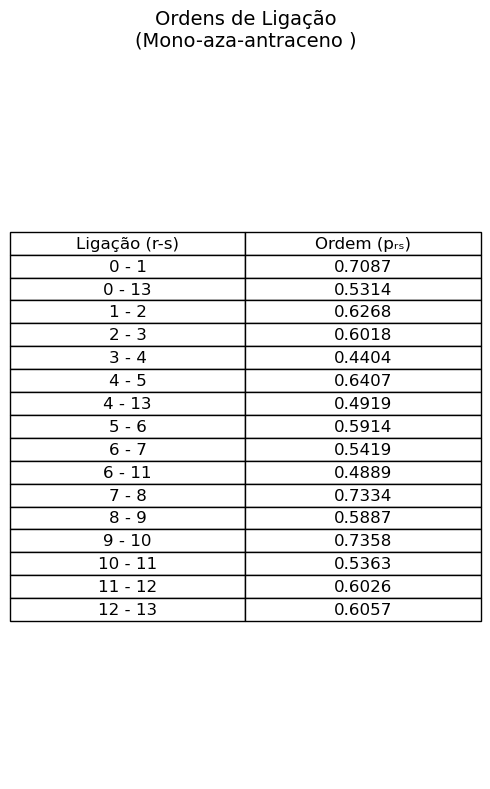

In [491]:
# --- 3. Geração e Exibição das Tabelas ---

# --- Tabela 1: Populações Eletrônicas ---
pop_data = [[f"{i}", f"{populations[i]:.4f}"] for i in range(14)]
pop_col_labels = ["Átomo (r)", "População (q\u1D63)"]

fig1, ax1 = plt.subplots(figsize=(4, 7))
ax1.axis('tight')
ax1.axis('off')
table1 = ax1.table(cellText=pop_data, colLabels=pop_col_labels, loc='center', cellLoc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(12)
table1.scale(1.2, 1.2)
ax1.set_title("Populações Eletrônicas\n(Mono-aza-antraceno )", fontsize=14, pad=20)
plt.tight_layout()

# --- Tabela 2: Ordens de Ligação ---
bond_data = []
for r in range(14):
    for s in range(r + 1, 14):
        if bond_orders[r, s] != 0:
            bond_data.append([f"{r} - {s}", f"{bond_orders[r,s]:.4f}"])
bond_col_labels = ["Ligação (r-s)", "Ordem (p\u1D63\u209B)"]

fig2, ax2 = plt.subplots(figsize=(5, 8))
ax2.axis('tight')
ax2.axis('off')
table2 = ax2.table(cellText=bond_data, colLabels=bond_col_labels, loc='center', cellLoc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(12)
table2.scale(1.2, 1.2)
ax2.set_title("Ordens de Ligação\n(Mono-aza-antraceno )", fontsize=14, pad=20)
plt.tight_layout()

plt.show()

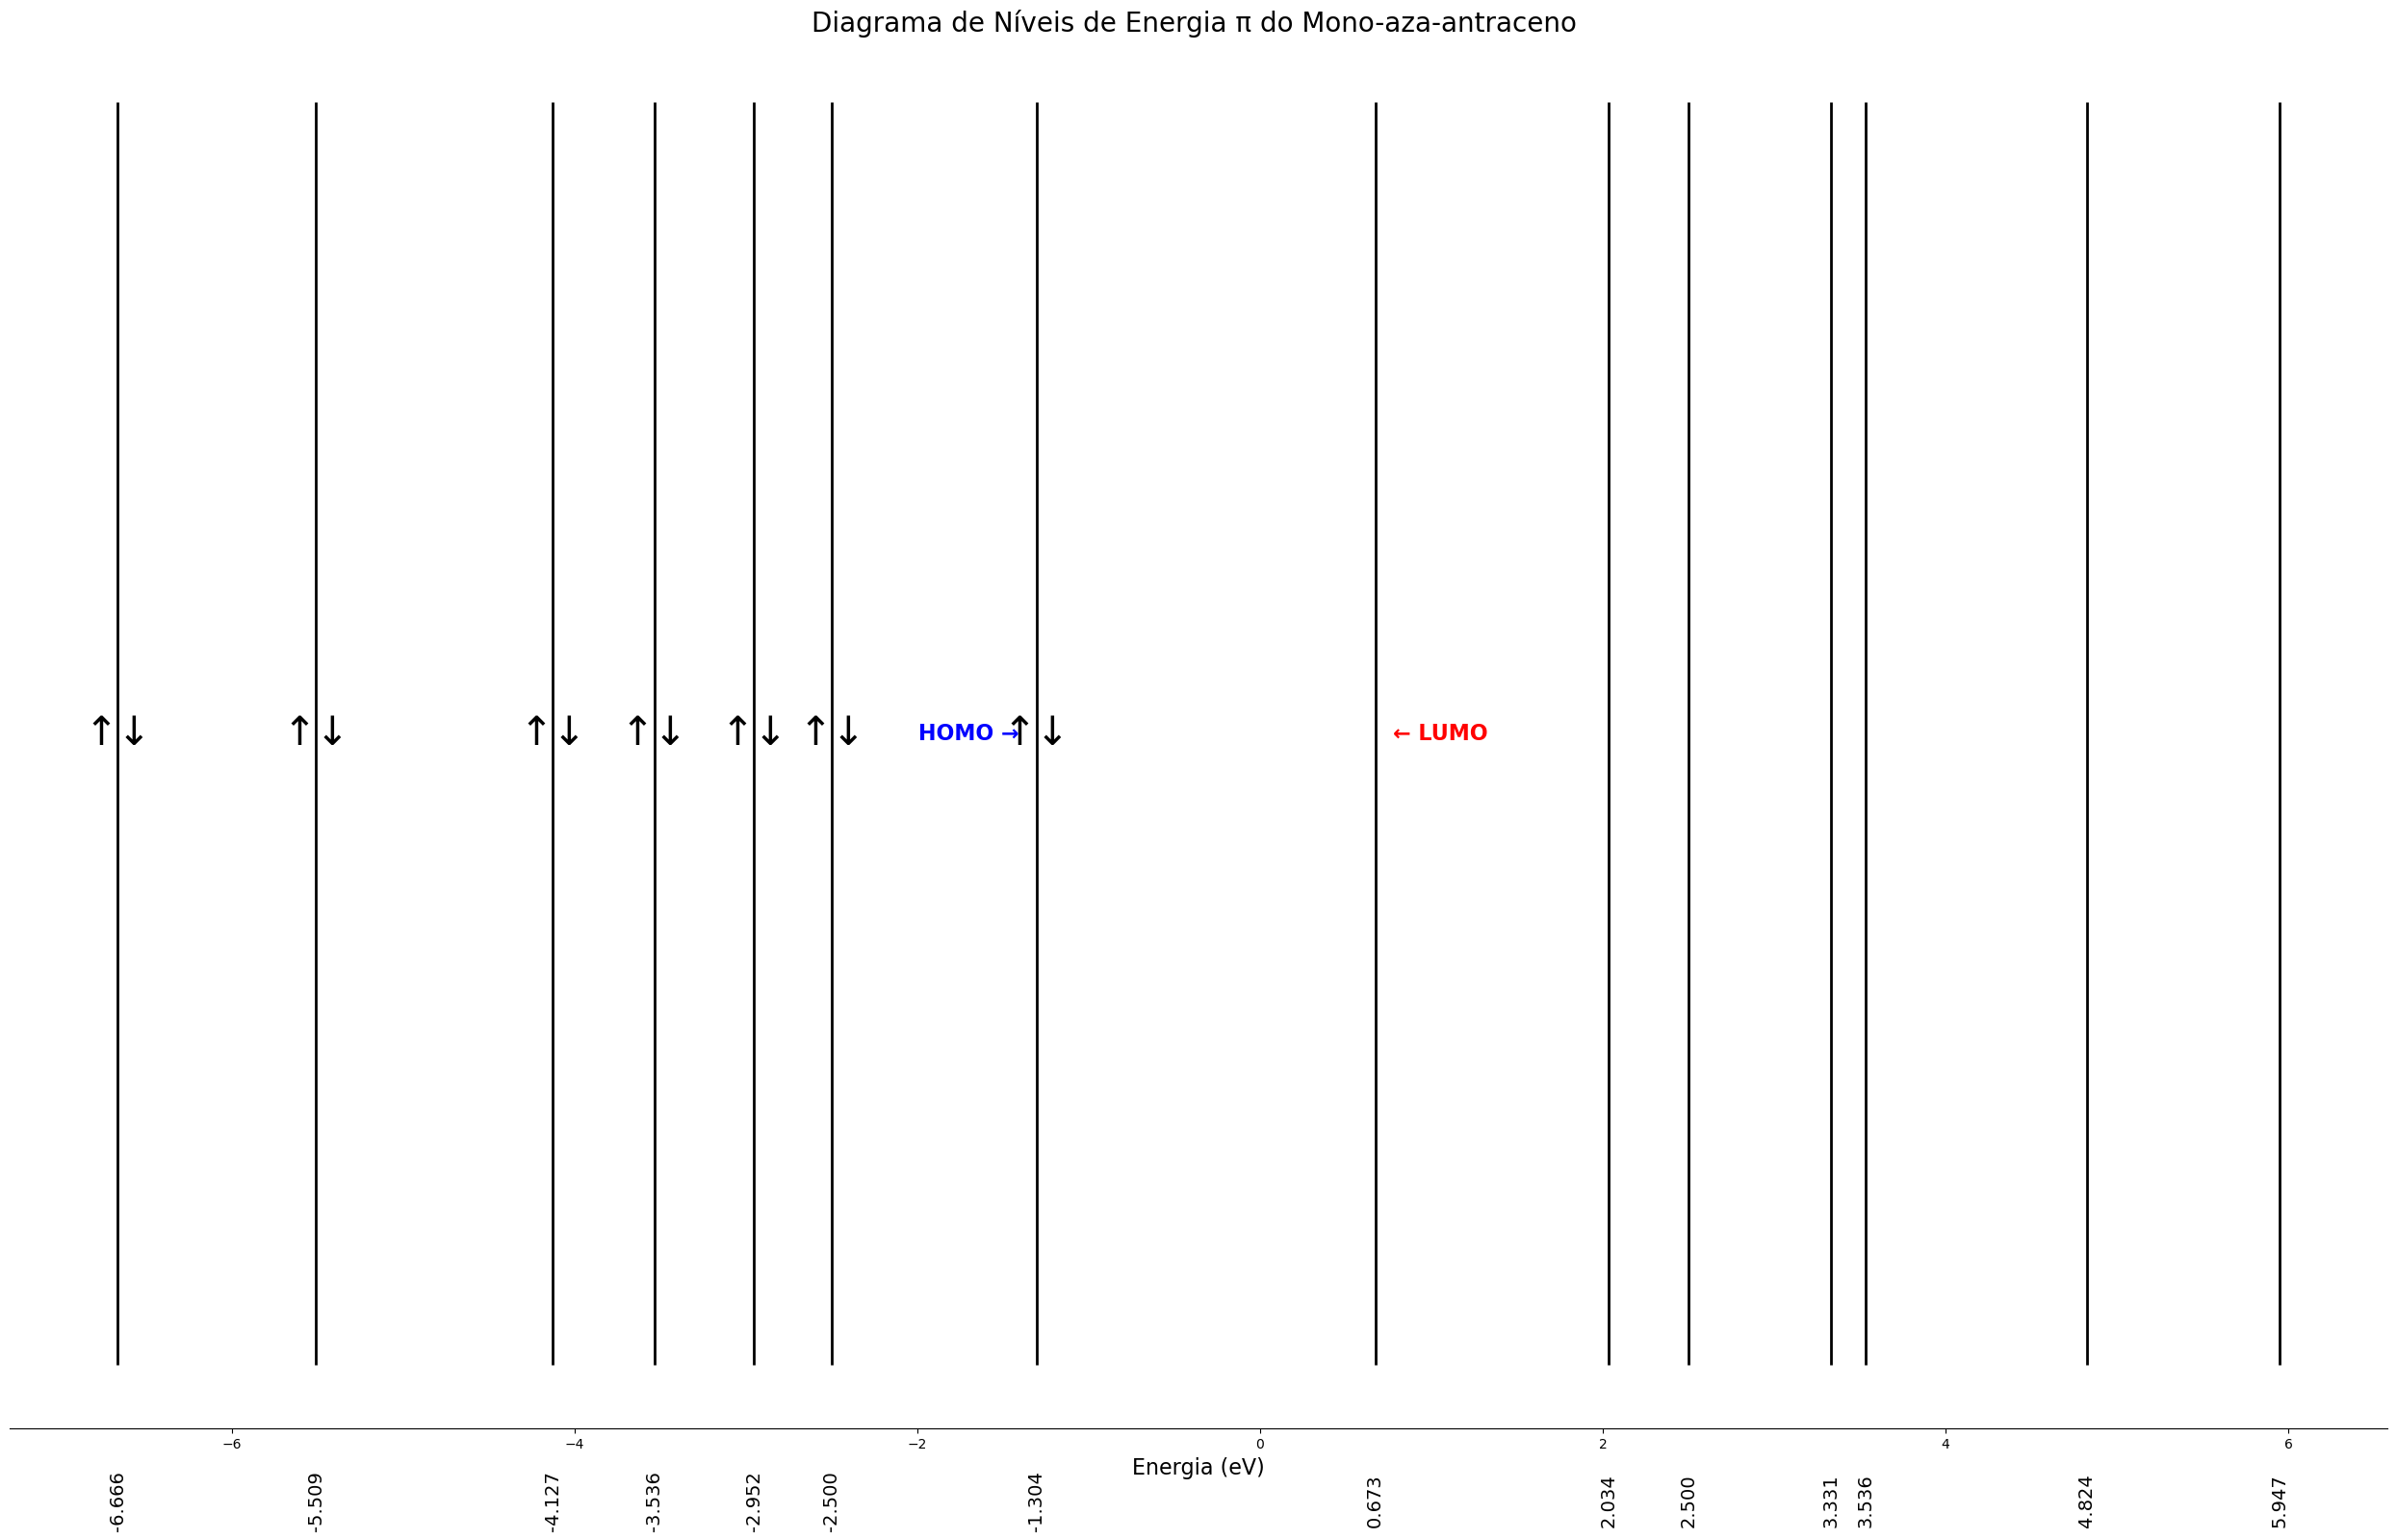

In [492]:
# --- Diagrama de Níveis de Energia (Horizontal) ---
fig, ax = plt.subplots(figsize=(25, 16))

# --- Definição dos tamanhos de fonte ---
ax.set_title("Diagrama de Níveis de Energia π do Mono-aza-antraceno ", fontsize=20)
ax.set_xlabel("Energia (eV)", fontsize=16)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for i, energy in enumerate(eigenvalues):
    ax.vlines(x=energy, ymin=0.8, ymax=2.2, color='k', lw=2)
    # Fonte para os valores de energia
    ax.text(energy, 0.65, f"{energy:.3f}", ha='center', va='center', rotation=90, fontsize=14)
    
    if i < num_occupied_orbitals:
        # Fonte para os elétrons
        ax.text(energy, 1.5, "↑↓", ha='center', va='center', fontsize=30)

# Fonte para os rótulos HOMO/LUMO
ax.text(homo_energy - 0.1, 1.5, "HOMO →", ha='right', va='center', color='blue', weight='bold', fontsize=16)
ax.text(lumo_energy + 0.1, 1.5, "← LUMO", ha='left', va='center', color='red', weight='bold', fontsize=16)

# Ajusta o layout para evitar que os textos fiquem cortados
plt.tight_layout()

# Opcional: exibe o gráfico em uma janela
plt.show()

### Di-aza-antraceno

![{CD3E63EF-4778-498E-A753-D97300DB2594}.png](Di-Aza-Antraceno.png)

In [493]:
# --- 1. Construção da Matriz ---

H = np.zeros((14, 14))

#Modificando a matriz

for i in range(14):
    if i == 3 or i == 10:
        H[i,i] = alphax(hN)
    else:
        H[i,i] = alphax(hC)

H[0,1] = H[1,0] = betaxx(kCC)
H[1,2] = H[2,1] = betaxx(kCC)
H[2,3] = H[3,2] = betaxx(kCN)
H[3,4] = H[4,3] = betaxx(kCN)
H[4,5] = H[5,4] = betaxx(kCC)
H[5,6] = H[6,5] = betaxx(kCC)
H[6,7] = H[7,6] = betaxx(kCC)
H[7,8] = H[8,7] = betaxx(kCC)
H[8,9] = H[9,8] = betaxx(kCC)
H[9,10] = H[10,9] = betaxx(kCN)
H[10,11] = H[11,10] = betaxx(kCN)
H[11,12] = H[12,11] = betaxx(kCC)
H[6,11] = H[11,6] = betaxx(kCC)
H[12,13] = H[13,12] = betaxx(kCC)
H[13,4] = H[4,13] = betaxx(kCC)
H[0,13] = H[13,0] = betaxx(kCC)

print("--- Matriz de Hückel (Determinante Secular em forma matricial) ---")
print_matrix(H)

eigenvalues, eigenvectors = np.linalg.eigh(H)

mo_coeffs = eigenvectors.T  # Transpor para que cada linha seja um orbital

num_pi_electrons = 14 # Número total de elétrons pi na azepina

num_occupied_orbitals = num_pi_electrons // 2 # Número de orbitais ocupados (2 elétrons por orbital)


# Cálculo das populações eletrônicas (q_r) para cada átomo r
populations = np.zeros(14)
for r in range(14): # Para cada átomo r
    q_r = 0
    for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
        q_r += 2 * (eigenvectors[r, i]) ** 2
    populations[r] = q_r

# Cálculo das ordens de ligação pi (p_rs) entre átomos r e s
# p_rs = Σ (g_i * c_ri * c_si) sobre todos os orbitais i
bond_orders = np.zeros((14, 14))
for r in range(14):
    for s in range(r + 1, 14):
        p_rs = 0
        if H[r, s] != 0:
            for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
                p_rs += 2 * mo_coeffs[i, r] * mo_coeffs[i, s]
            bond_orders[r, s] = bond_orders[s, r] = p_rs

--- Matriz de Hückel (Determinante Secular em forma matricial) ---
  0.0  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.5
 -2.5   0.0  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -2.5   0.0  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -2.5 -3.75  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.5
  0.0   0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0  -2.5   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.5   0.0  -2.5   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.5 -3.75  -2.5   0.0   0.0
  0.0   0

In [494]:
# --- 4. Apresentação dos Resultados ---

print("\n--- Níveis de Energia (eV) ---")
energy_headers = ["Orbital (ψ)", "Energia (x)", "Ocupação"]
energy_data = []
for i, energy in enumerate(eigenvalues):
    occupation = "2 e-" if i < num_occupied_orbitals else "0 e-"
    energy_data.append([f"ψ_{i+1}", f"{energy:.4f}", occupation])
print(tabulate(energy_data, headers=energy_headers, tablefmt="grid"))


--- Níveis de Energia (eV) ---
+---------------+---------------+------------+
| Orbital (ψ)   |   Energia (x) | Ocupação   |
+===============+===============+============+
| ψ_1           |       -6.8167 | 2 e-       |
+---------------+---------------+------------+
| ψ_2           |       -6.3503 | 2 e-       |
+---------------+---------------+------------+
| ψ_3           |       -4.3588 | 2 e-       |
+---------------+---------------+------------+
| ψ_4           |       -4.0451 | 2 e-       |
+---------------+---------------+------------+
| ψ_5           |       -3.2755 | 2 e-       |
+---------------+---------------+------------+
| ψ_6           |       -2.5    | 2 e-       |
+---------------+---------------+------------+
| ψ_7           |       -1.6814 | 2 e-       |
+---------------+---------------+------------+
| ψ_8           |        0.4341 | 0 e-       |
+---------------+---------------+------------+
| ψ_9           |        1.5451 | 0 e-       |
+---------------+-----------

In [495]:
# Identificar HOMO e LUMO
homo_index = num_occupied_orbitals - 1
lumo_index = num_occupied_orbitals
homo_energy = eigenvalues[homo_index]
lumo_energy = eigenvalues[lumo_index]
print(f"\nHOMO: ψ_{homo_index + 1} (Energia = {homo_energy:.4f} eV)")
print(f"LUMO: ψ_{lumo_index + 1} (Energia = {lumo_energy:.4f} eV)")
print("-" * 60)

print("\n--- Coeficientes dos Orbitais Moleculares (ψ_i) ---")
mo_headers = ["Orbital"] + [f"Átomo {j+1}" for j in range(14)]
mo_data = []
for i, mo in enumerate(mo_coeffs):
    mo_data.append([f"ψ_{i+1}"] + [f"{c:.3f}" for c in mo])
print(tabulate(mo_data, headers=mo_headers, tablefmt="grid"))



HOMO: ψ_7 (Energia = -1.6814 eV)
LUMO: ψ_8 (Energia = 0.4341 eV)
------------------------------------------------------------

--- Coeficientes dos Orbitais Moleculares (ψ_i) ---
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+
| Orbital   |   Átomo 1 |   Átomo 2 |   Átomo 3 |   Átomo 4 |   Átomo 5 |   Átomo 6 |   Átomo 7 |   Átomo 8 |   Átomo 9 |   Átomo 10 |   Átomo 11 |   Átomo 12 |   Átomo 13 |   Átomo 14 |
+===========+===========+===========+===========+===========+===========+===========+===========+===========+===========+============+============+============+============+============+
| ψ_1       |     0.14  |     0.128 |     0.21  |     0.444 |     0.335 |     0.216 |     0.253 |     0.14  |     0.128 |      0.21  |      0.444 |      0.335 |      0.216 |      0.253 |
+-----------+-----------+-----------+-----------+-----------+-----------

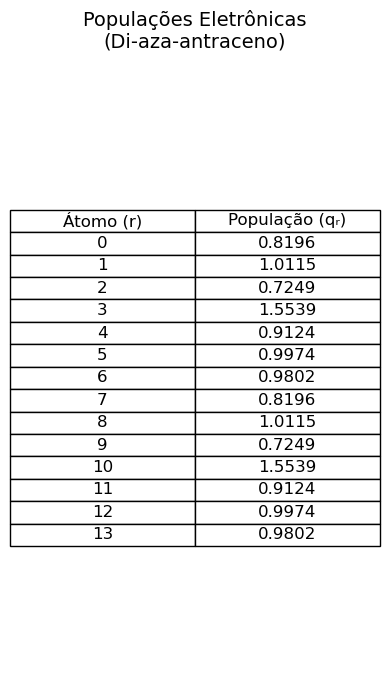

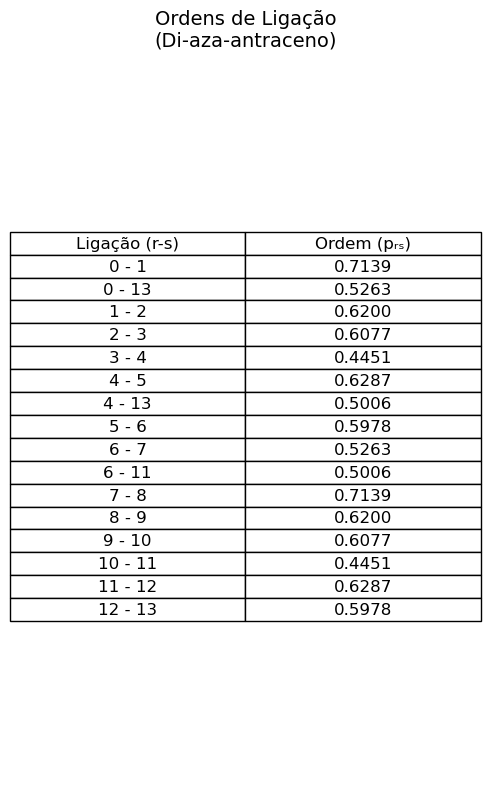

In [496]:
# --- 3. Geração e Exibição das Tabelas ---

# --- Tabela 1: Populações Eletrônicas ---
pop_data = [[f"{i}", f"{populations[i]:.4f}"] for i in range(14)]
pop_col_labels = ["Átomo (r)", "População (q\u1D63)"]

fig1, ax1 = plt.subplots(figsize=(4, 7))
ax1.axis('tight')
ax1.axis('off')
table1 = ax1.table(cellText=pop_data, colLabels=pop_col_labels, loc='center', cellLoc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(12)
table1.scale(1.2, 1.2)
ax1.set_title("Populações Eletrônicas\n(Di-aza-antraceno)", fontsize=14, pad=20)
plt.tight_layout()

# --- Tabela 2: Ordens de Ligação ---
bond_data = []
for r in range(14):
    for s in range(r + 1, 14):
        if bond_orders[r, s] != 0:
            bond_data.append([f"{r} - {s}", f"{bond_orders[r,s]:.4f}"])
bond_col_labels = ["Ligação (r-s)", "Ordem (p\u1D63\u209B)"]

fig2, ax2 = plt.subplots(figsize=(5, 8))
ax2.axis('tight')
ax2.axis('off')
table2 = ax2.table(cellText=bond_data, colLabels=bond_col_labels, loc='center', cellLoc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(12)
table2.scale(1.2, 1.2)
ax2.set_title("Ordens de Ligação\n(Di-aza-antraceno)", fontsize=14, pad=20)
plt.tight_layout()

plt.show()

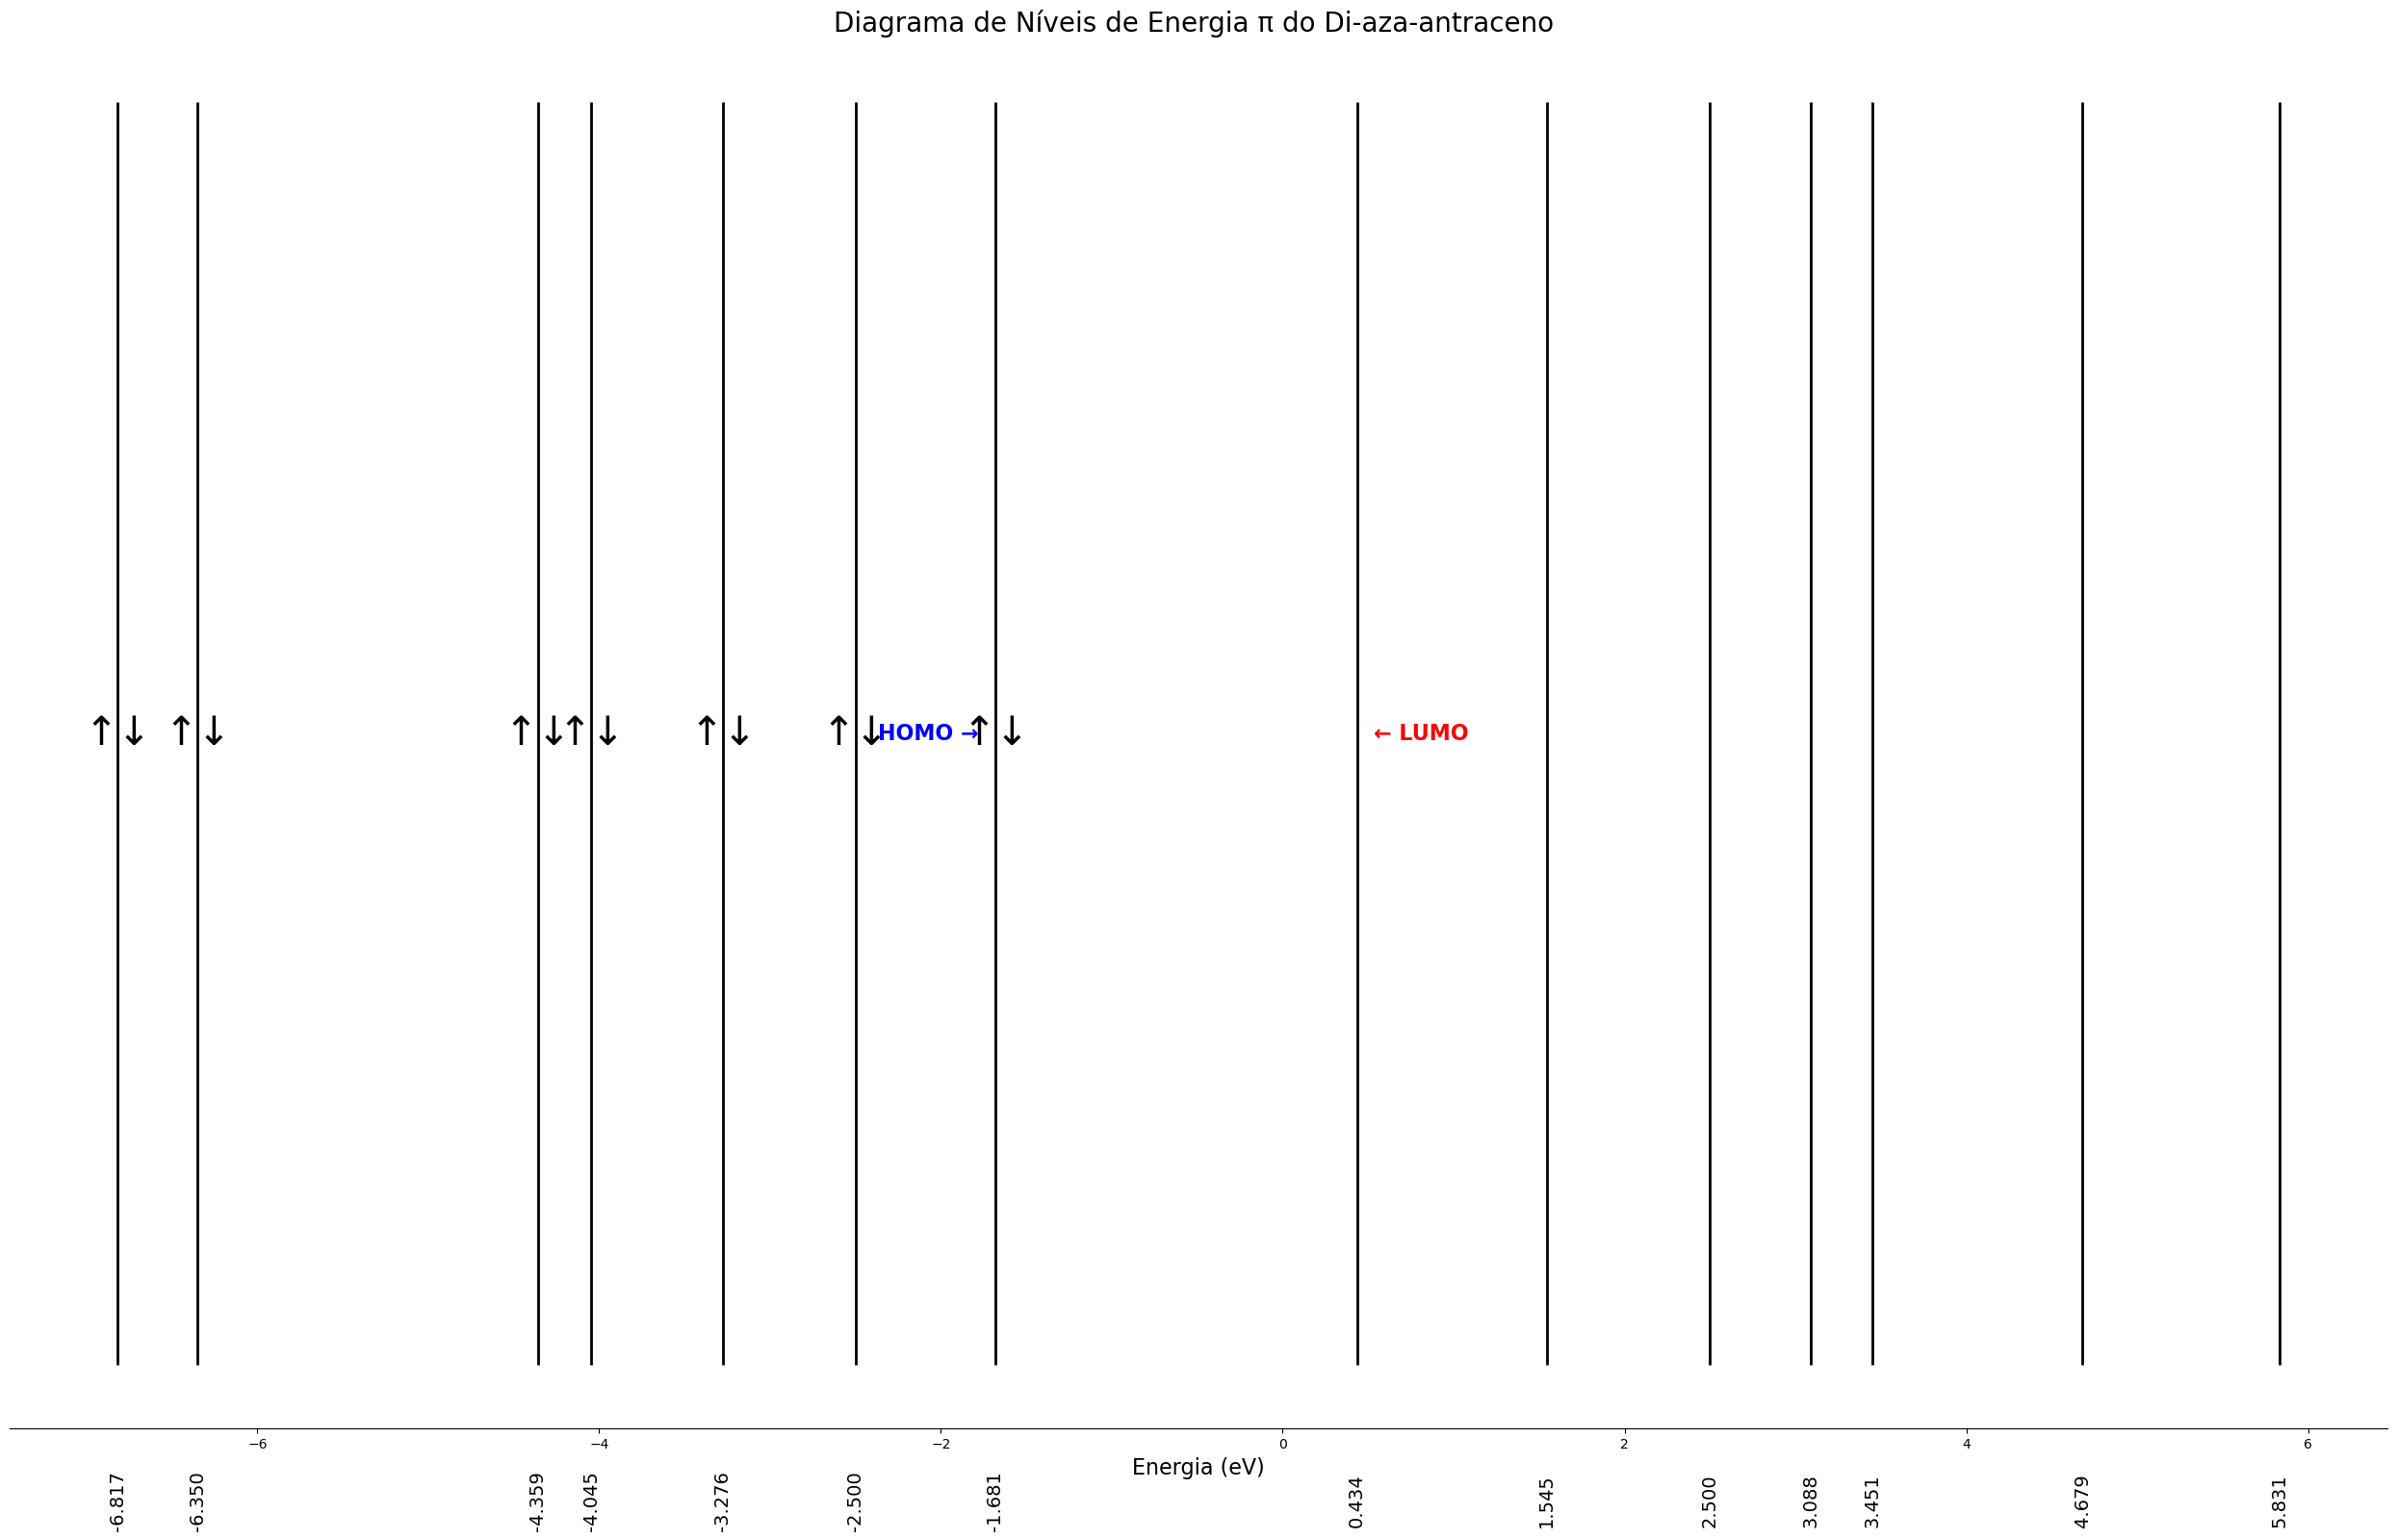

In [497]:
# --- Diagrama de Níveis de Energia (Horizontal) ---
fig, ax = plt.subplots(figsize=(25, 16))

# --- Definição dos tamanhos de fonte ---
ax.set_title("Diagrama de Níveis de Energia π do Di-aza-antraceno ", fontsize=20)
ax.set_xlabel("Energia (eV)", fontsize=16)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for i, energy in enumerate(eigenvalues):
    ax.vlines(x=energy, ymin=0.8, ymax=2.2, color='k', lw=2)
    # Fonte para os valores de energia
    ax.text(energy, 0.65, f"{energy:.3f}", ha='center', va='center', rotation=90, fontsize=14)
    
    if i < num_occupied_orbitals:
        # Fonte para os elétrons
        ax.text(energy, 1.5, "↑↓", ha='center', va='center', fontsize=30)

# Fonte para os rótulos HOMO/LUMO
ax.text(homo_energy - 0.1, 1.5, "HOMO →", ha='right', va='center', color='blue', weight='bold', fontsize=16)
ax.text(lumo_energy + 0.1, 1.5, "← LUMO", ha='left', va='center', color='red', weight='bold', fontsize=16)

# Ajusta o layout para evitar que os textos fiquem cortados
plt.tight_layout()

# Opcional: exibe o gráfico em uma janela
plt.show()


### HOMOs e LUMOs

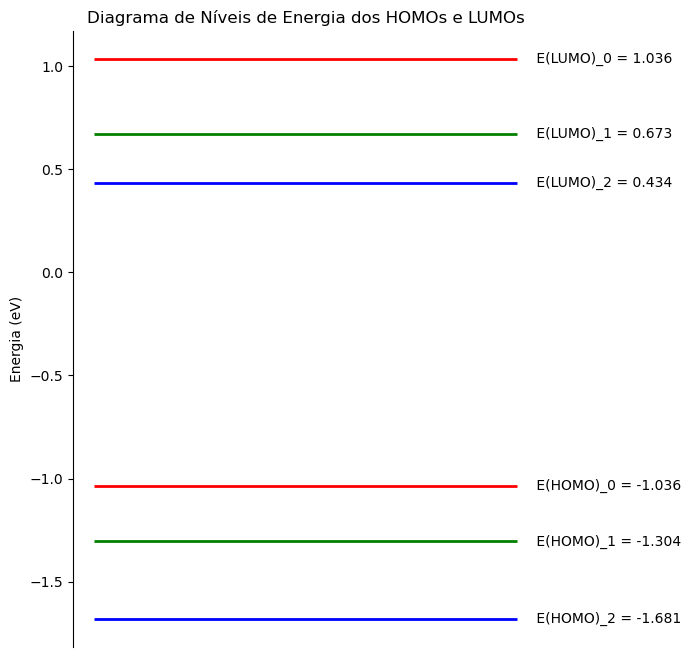

In [514]:
# --- 5. Diagrama de Níveis de Energia ---
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_title("Diagrama de Níveis de Energia dos HOMOs e LUMOs")
ax.set_ylabel("Energia (eV)")
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

colors =['red','green','blue']

for i,energy in enumerate(HOMOs):
    ax.hlines(y=energy, xmin=0.8, xmax=2.2, color=colors[i], lw=2)
    ax.text(2.25, energy, f" E(HOMO)_{i} = {energy:.3f}", va='center')
for i,energy in enumerate(LUMOs):
    ax.hlines(y=energy, xmin=0.8, xmax=2.2, color=colors[i], lw=2)
    ax.text(2.25, energy, f" E(LUMO)_{i} = {energy:.3f}", va='center')

plt.show()

In [512]:
print(Gaps)

[2.071067811865474, 1.9769208125770628, 2.115484245774323]
